In [1]:
#import numpy
import numpy as np
#import openCV
import cv2

In [2]:
image_path = "images"
image_name = "/Checklist1 9"
reference_path = image_path + "/Checklist1.jpg"
scanned_path = image_path + image_name +".jpeg"


In [9]:
MAX_FEATURES = 500
GOOD_MATCH_PERCENT = 0.15

def alignImages(im1, im2):
  
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2, None)
  
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("images/references/matches.jpg", imMatches)
  
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width  = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  
  return im1Reg, h

In [10]:
# Read reference form
formReference = cv2.imread(reference_path, cv2.IMREAD_GRAYSCALE)

# Read form to be aligned
form = cv2.imread(scanned_path, cv2.IMREAD_GRAYSCALE)

# Registered image will be resotred in imReg.  
# The estimated homography will be stored in h. 
formAligned, h = alignImages(form, formReference)

# Write aligned form to disk. 
outFilename = image_path + "/aligned" + image_name + ".jpg"
cv2.imwrite(outFilename, formAligned)

True

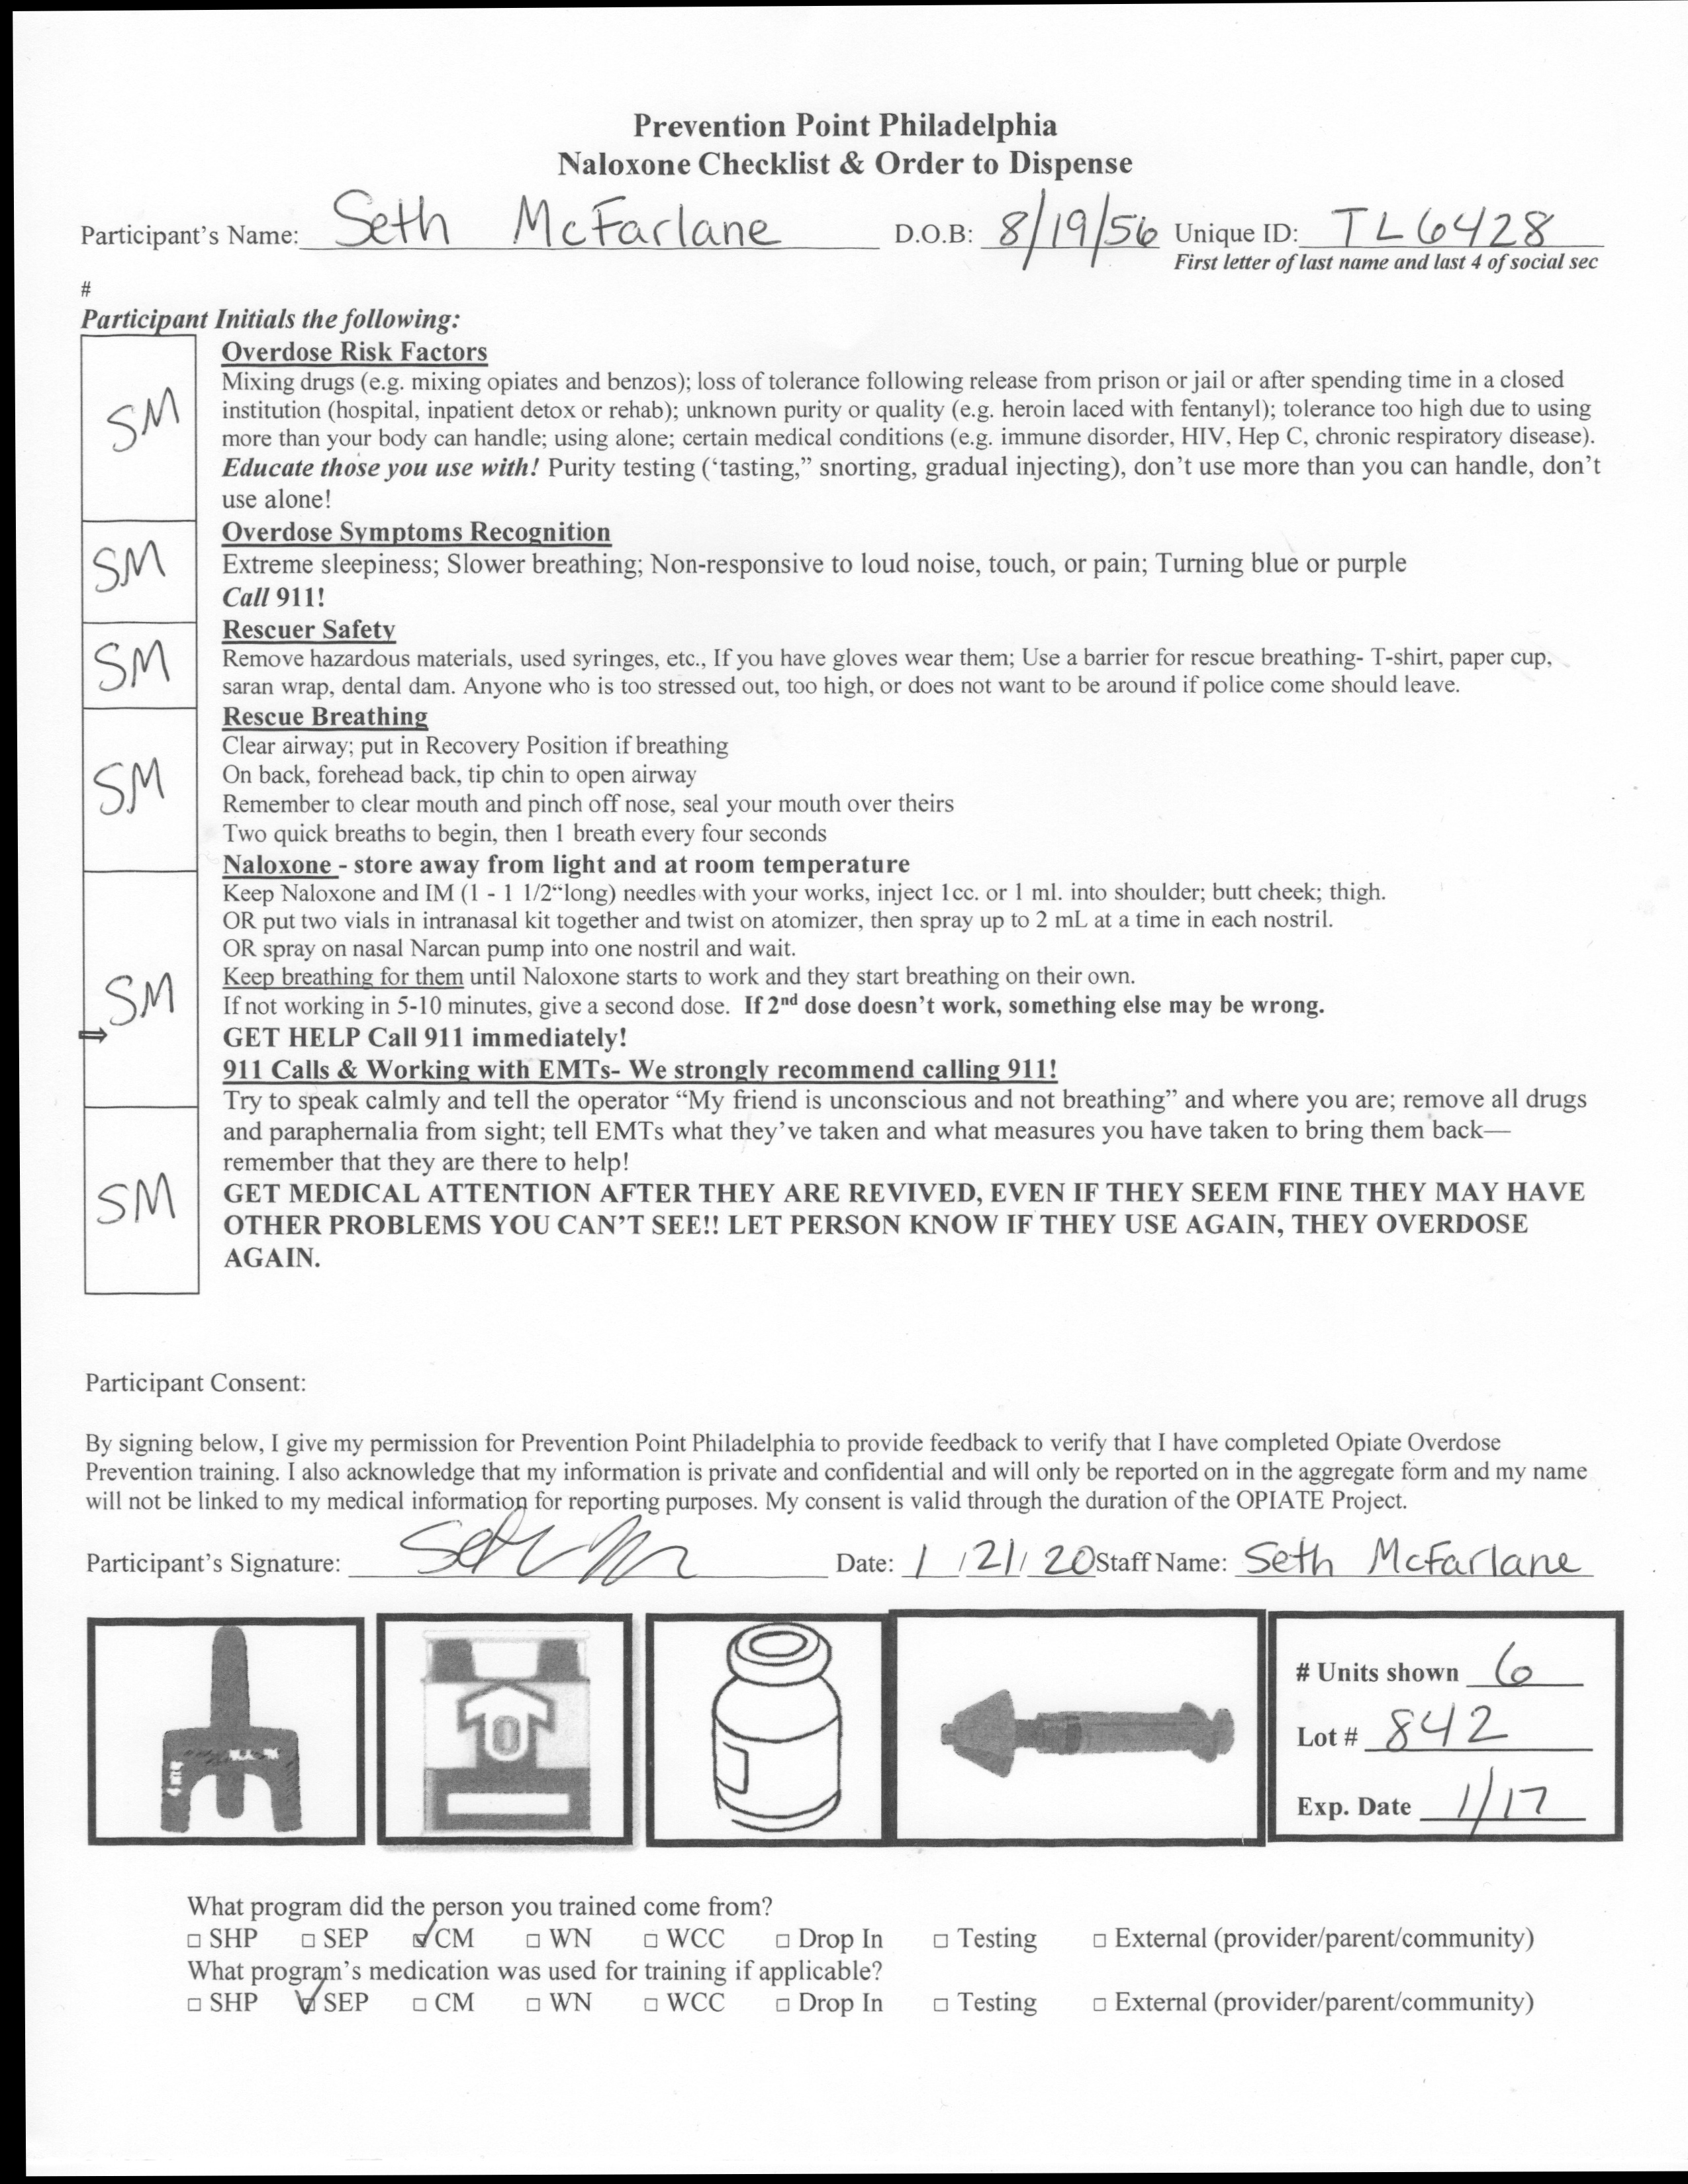

In [8]:
Image.fromarray(formAligned)

In [6]:
from PIL import Image